In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
nba = pd.read_csv("final_table.csv", index_col=0)
nba.fillna(0, inplace=True)
# import nba_py as nba
# from nba_py import team
# from nba_py import game
# from nba_py import player

In [2]:
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# create database for g-league players and player who sat
# out and did not play all year 
games= nba[ nba['pts'] <= 100.0 ]
games

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
637,Paul Watson,TOR,SF,50752.0,1637.16,25.0,-7.1,31.0,8.0,70.0,5.0,3.0,1.0
603,Cameron Payne,PHO,PG,196288.0,2256.18,25.0,15.7,87.0,8.0,183.0,24.0,8.0,2.0
614,Johnathan Williams,WAS,C,106181.0,2359.58,24.0,14.0,45.0,15.0,180.0,8.0,1.0,8.0
604,Mychal Mulder,GSW,SG,187782.0,2438.73,25.0,7.8,77.0,7.0,204.0,8.0,2.0,1.0
620,Donta Hall,BRK,PF,101504.0,3075.88,22.0,17.2,33.0,5.0,85.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
641,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
642,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(nba[nba['Player']=="Darius Bazley"])

            Player   tm pos  yr2019_20  avg_cost_per_pt   Age  PER    pts  \
384  Darius Bazley  OKC  PF  2284800.0           6680.7  19.0  9.6  342.0   

        g      mp   ast   stl   blk  
384  61.0  1130.0  41.0  23.0  41.0  


In [5]:
# remove players that did not play any games due to injury and G-league/developmental league players 
# based on nba salary scale and not to account those during predictions
index_names = nba[ nba['pts'] <= 100.0 ].index
# drop these row indexes 
# from dataFrame 
nba.drop(index_names, inplace = True) 
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,16229213.0,131944.82,30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0
95,Brandon Knight,DET,PG,15643750.0,150420.67,28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0
34,Otto Porter,CHI,SF,27250576.0,163177.10,26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0
40,Andre Drummond,CLE,C,27093019.0,193521.56,26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0


In [6]:
nba.columns

Index(['Player', 'tm', 'pos', 'yr2019_20', 'avg_cost_per_pt', 'Age', 'PER',
       'pts', 'g', 'mp', 'ast', 'stl', 'blk'],
      dtype='object')

In [7]:
#mask = np.random.rand(len(nba))<0.8
# mask = np.random.rand(len(nba))<0.1
# nba_train =nba[mask]
# nba_test=nba[~mask]
nba_train= nba
nba_test=nba
print ('training data set length='+str(len(nba_train)))
print("testing data set length="+str(len(nba_test)))

training data set length=345
testing data set length=345


In [8]:
# setup the regression in patsy notation. telling patsy that
#"yr2019_20"/salary is our dependent variable and it
# depends on the regression variables: age, per, pts, g, mp, ast, stl
# and blocks
expr = """yr2019_20~Age+PER+pts+g+mp+ast+stl+blk"""

In [9]:
# set up X and y
y_train,X_train= dmatrices(expr,nba_train,return_type='dataframe')
y_test, X_test = dmatrices(expr,nba_test, return_type='dataframe')

In [10]:
# using the statsmodel GLM class train the poisson regression model on the training set
poisson_training_results =sm.GLM(y_train,X_train, family=sm.families.Poisson()).fit()

In [11]:
print(poisson_training_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              yr2019_20   No. Observations:                  345
Model:                            GLM   Df Residuals:                      336
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.5367e+08
Date:                Sat, 12 Dec 2020   Deviance:                   1.1073e+09
Time:                        13:37:12   Pearson chi2:                 1.11e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9748      0.000   7.61e+04      0.0

In [12]:
poisson_predictions=poisson_training_results.get_prediction(X_test)

In [13]:
prediction_summary_frame=poisson_predictions.summary_frame()

In [14]:
prediction_summary_frame.astype("int64")

,mean,mean_se,mean_ci_lower,mean_ci_upper
612,2751941,151,2751644,2752238
587,3123511,149,3123217,3123804
545,5894305,234,5893846,5894763
606,3624306,170,3623972,3624641
530,12321126,733,12319689,12322563
...,...,...,...,...
90,15489493,684,15488150,15490835
95,7349934,600,7348758,7351110
34,10838315,473,10837387,10839243
40,18212941,1118,18210750,18215133


In [15]:
predicted_salary = prediction_summary_frame['mean'].astype("int64")
predicted_salary=predicted_salary
#predicted_counts=predicted_counts.style.format("${:,.2f}")
predicted_salary


612     2751941
587     3123511
545     5894305
606     3624306
530    12321126
         ...   
90     15489493
95      7349934
34     10838315
40     18212941
0      28710478
Name: mean, Length: 345, dtype: int64

In [16]:
actual_salary= y_test['yr2019_20']
actual_salary.sample(5)

199     7839960.0
87     17000000.0
393     2193480.0
375     2338847.0
186     8719320.0
Name: yr2019_20, dtype: float64

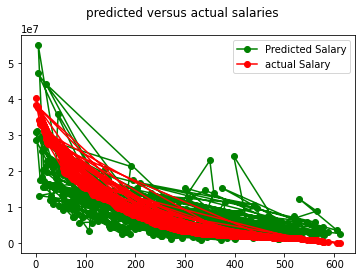

In [17]:
fig=plt.figure()
fig.suptitle('predicted versus actual salaries')
predicted, =plt.plot(X_test.index, predicted_salary,'go-',
                 label="Predicted Salary")
actual, =plt.plot(X_test.index, actual_salary,'ro-',
                 label="actual Salary")
plt.legend(handles=[predicted, actual])

In [18]:
nba['predicted_salary'] = predicted_salary
nba

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
612,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941
587,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,3123511
545,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,5894305
606,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3624306
530,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,12321126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gorgui Dieng,MEM,C,16229213.0,131944.82,30.0,17.8,123.0,17.0,318.0,15.0,14.0,17.0,15489493
95,Brandon Knight,DET,PG,15643750.0,150420.67,28.0,5.4,104.0,9.0,221.0,38.0,5.0,1.0,7349934
34,Otto Porter,CHI,SF,27250576.0,163177.10,26.0,15.8,167.0,14.0,331.0,25.0,15.0,6.0,10838315
40,Andre Drummond,CLE,C,27093019.0,193521.56,26.0,22.1,140.0,8.0,225.0,14.0,12.0,11.0,18212941


In [19]:
nba_salaries=pd.concat([nba, games], ignore_index=True, sort=False)
nba_salaries

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
0,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941.0
1,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,3123511.0
2,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,5894305.0
3,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3624306.0
4,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,12321126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
522,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
523,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
524,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
nba_salaries['predicted_salary'] = nba_salaries['predicted_salary'].fillna(0)
nba_salaries.sample(10)

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
184,Lonzo Ball,NOP,PG,8719320.0,11703.79,22.0,13.1,745.0,63.0,2025.0,438.0,88.0,38.0,6867169.0
56,Jamal Murray,DEN,PG,4444746.0,4074.01,22.0,17.7,1091.0,59.0,1904.0,284.0,67.0,17.0,9030289.0
518,Yante Maten,0,0,100000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,Jarrett Allen,BRK,C,2376840.0,3066.89,21.0,20.7,775.0,70.0,1852.0,110.0,40.0,92.0,6365324.0
339,Blake Griffin,DET,PF,34234964.0,122705.96,30.0,11.9,279.0,18.0,512.0,59.0,7.0,7.0,13243421.0
101,Darius Bazley,OKC,PF,2284800.0,6680.70,19.0,9.6,342.0,61.0,1130.0,41.0,23.0,41.0,1475767.0
133,Harry Giles,SAC,PF,2578800.0,8160.76,21.0,16.4,316.0,46.0,667.0,60.0,22.0,18.0,2697292.0
334,Justise Winslow,MIA,SF,13000000.0,104838.71,23.0,8.5,124.0,11.0,352.0,44.0,7.0,5.0,6184869.0
292,Cory Joseph,SAC,PG,12000000.0,26200.87,28.0,10.1,458.0,72.0,1759.0,251.0,53.0,21.0,4957699.0
0,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941.0


In [21]:
def salaries(row):
    if row['predicted_salary']==0.0:
        return row['yr2019_20']
    else:
        return row['predicted_salary']
nba_salaries['predicted_salary']=nba_salaries.apply(lambda row: salaries(row),axis=1)
nba_salaries 

,Player,tm,pos,yr2019_20,avg_cost_per_pt,Age,PER,pts,g,mp,ast,stl,blk,predicted_salary
0,Luguentz Dort,OKC,SG,155647.0,637.90,20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,2751941.0
1,Ky Bowman,GSW,PG,350189.0,1045.34,22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,3123511.0
2,Eric Paschall,GSW,PF,898310.0,1073.25,23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,5894305.0
3,PJ Dozier,DEN,PG,183115.0,1089.97,23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,3624306.0
4,Devonte' Graham,CHO,PG,1416852.0,1237.43,24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,12321126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,50752.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50752.0
522,Isaiah Taylor,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0
523,Tyler Lydon,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0
524,Hollis Thompson,0,0,50000.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0


In [22]:
nba_salaries= nba_salaries[["Player", "tm", "pos", "yr2019_20","predicted_salary", "Age","PER", "pts", "g", "mp", "ast", "stl", "blk"]]
nba_salaries['yr2019_20']=nba_salaries['yr2019_20'].map("${:,.2f}".format)
nba_salaries['predicted_salary']=nba_salaries['predicted_salary'].map("${:,.2f}".format)

#nba_salaries[['yr2019_20', 'predicted_salary']].apply(lambda x: map(lambda x:'${:,.2f}'.format(x),x),axis=1)
nba_salaries.sample(20)

<ipython-input-22-d716a586a59d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_salaries['yr2019_20']=nba_salaries['yr2019_20'].map("${:,.2f}".format)
<ipython-input-22-d716a586a59d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_salaries['predicted_salary']=nba_salaries['predicted_salary'].map("${:,.2f}".format)


,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
74,Brandon Ingram,NOP,PF,"$7,265,485.00","$10,896,955.00",22.0,18.8,1477.0,62.0,2104.0,259.0,61.0,38.0
249,Jerome Robinson,WAS,SG,"$3,567,720.00","$4,125,266.00",22.0,7.4,197.0,21.0,503.0,41.0,15.0,9.0
412,Dewan Hernandez,TOR,C,"$898,310.00","$898,310.00",23.0,12.9,14.0,6.0,28.0,3.0,1.0,0.0
491,Nenê Hilário,0,0,"$2,564,753.00","$2,564,753.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,Rudy Gobert,UTA,C,"$25,008,427.00","$25,198,230.00",27.0,21.7,1026.0,68.0,2333.0,101.0,51.0,135.0
288,Rodney Hood,POR,SF,"$5,718,000.00","$10,417,943.00",27.0,12.2,230.0,21.0,619.0,32.0,17.0,4.0
305,Gary Harris,DEN,SG,"$17,839,286.00","$7,457,102.00",25.0,9.7,581.0,56.0,1780.0,118.0,76.0,14.0
493,Matt Barnes,0,0,"$2,133,541.00","$2,133,541.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,Markelle Fultz,ORL,PG,"$9,745,200.00","$4,239,796.00",21.0,14.3,870.0,72.0,1996.0,369.0,90.0,11.0
236,George Hill,MIL,PG,"$9,133,907.00","$10,565,081.00",33.0,16.9,554.0,59.0,1271.0,180.0,47.0,5.0


In [23]:
nba_salaries

,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
nba_salaries.to_csv("poisson_regression.csv")

In [25]:
nba_salaries.to_json("salaries_prediction.json", orient="records",)

In [26]:
teams=pd.read_json("salaries_prediction.json")
teams


,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20,7.6,244,36,820,27,31,4
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22,9.1,335,45,1015,131,44,10
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23,14.5,837,60,1654,127,32,13
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23,11.6,168,29,412,63,14,6
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24,15.8,1145,63,2211,471,62,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0,0.0,0,0,0,0,0,0
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0,0.0,0,0,0,0,0,0
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0,0.0,0,0,0,0,0,0
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0,0.0,0,0,0,0,0,0


In [27]:
import re
import urllib
from time import sleep

In [28]:
def build_team_urls():
    # Open the espn teams webpage and extract the names of each roster available.
    f = urllib.request.urlopen('http://www.espn.com/nba/teams')
    teams_source = f.read().decode('utf-8')
    teams = dict(re.findall("www\.espn\.com/nba/team/_/name/(\w+)/(.+?)\",", teams_source))
    # Using the names of the rosters, create the urls of each roster
    roster_urls = []
    for key in teams.keys():
        # each roster webpage follows this general pattern.
        roster_urls.append('http://www.espn.com/nba/team/roster/_/name/' + key + '/' + teams[key])
        teams[key] = str(teams[key])
    return dict(zip(teams.values(), roster_urls))

In [29]:
rosters = build_team_urls()
rosters

{'boston-celtics': 'http://www.espn.com/nba/team/roster/_/name/bos/boston-celtics',
 'brooklyn-nets': 'http://www.espn.com/nba/team/roster/_/name/bkn/brooklyn-nets',
 'new-york-knicks': 'http://www.espn.com/nba/team/roster/_/name/ny/new-york-knicks',
 'philadelphia-76ers': 'http://www.espn.com/nba/team/roster/_/name/phi/philadelphia-76ers',
 'toronto-raptors': 'http://www.espn.com/nba/team/roster/_/name/tor/toronto-raptors',
 'chicago-bulls': 'http://www.espn.com/nba/team/roster/_/name/chi/chicago-bulls',
 'cleveland-cavaliers': 'http://www.espn.com/nba/team/roster/_/name/cle/cleveland-cavaliers',
 'detroit-pistons': 'http://www.espn.com/nba/team/roster/_/name/det/detroit-pistons',
 'indiana-pacers': 'http://www.espn.com/nba/team/roster/_/name/ind/indiana-pacers',
 'milwaukee-bucks': 'http://www.espn.com/nba/team/roster/_/name/mil/milwaukee-bucks',
 'atlanta-hawks': 'http://www.espn.com/nba/team/roster/_/name/atl/atlanta-hawks',
 'charlotte-hornets': 'http://www.espn.com/nba/team/roste

In [30]:
url = "https://www.espn.com/nba/team/roster/_/name/gs/golden-state-warriors"
f = urllib.request.urlopen(url)
roster_source = f.read().decode('utf-8')
roster_source

'\n        <!doctype html>\n        <html lang="en">\n            <head>\n                <meta charSet="utf-8" />\n\n                <!-- ESPNFITT | 1ef687da13bb | 4295 | 79a41e77d954b0e5aaf7d0c6b7b070b8625b0f21 | Sat, 12 Dec 2020 18:37:05 GMT -->\n                <script type=\'text/javascript\' >\n        ;(function(){\n            function gc(n){var r=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return r?r[2]:null}function sc(n){document.cookie=n}function smpl(n){var r=n/100;return!!r&&Math.random()<=r}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(100)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;\n            _nr && window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return 

In [31]:
player_regex = ('\"(\w+\s\w+)\",\"href\"\:\"https\://www.espn.com/nba/player/.*?\",(.*?)\}')
#player_regex=('\{\"name\"\:\"(\w+\s\w+)\",\"href\"\:\"http\://www\.espn\.com/nba/player/.*?\",(.*?)\}')
#player_regex
player_info = re.findall(player_regex, roster_source)
player_info[0:4]

[('Kent Bazemore',
  '"uid":"s:40~l:46~a:6637","guid":"1b9fcc3b945fa8c17aa9a72b5dab4fa5","id":"6637","height":"6\' 5\\"","weight":"206 lbs","age":31,"position":"SG","jersey":"26","salary":"$1,620,564","birthDate":"07/01/89","headshot":"https://a.espncdn.com/i/headshots/nba/players/full/6637.png","lastName":"Kent Bazemore","experience":8,"college":"Old Dominion","birthPlace":"Kelford, NC"'),
 ('Marquese Chriss',
  '"uid":"s:40~l:46~a:3907487","guid":"a320ecf1d6481b7518ddc1dc576c27b4","id":"3907487","height":"6\' 9\\"","weight":"249 lbs","age":23,"position":"SF","jersey":"32","salary":"$1,824,003","birthDate":"07/02/97","headshot":"https://a.espncdn.com/i/headshots/nba/players/full/3907487.png","lastName":"Marquese Chriss","experience":4,"college":"Washington","birthPlace":"SACRAMENTO, CA"'),
 ('Stephen Curry',
  '"uid":"s:40~l:46~a:3975","guid":"5dda51f150c966e12026400b73f34fad","id":"3975","height":"6\' 3\\"","weight":"193 lbs","age":32,"position":"PG","jersey":"30","salary":"$43,006,3

In [32]:
import json
steph = json.loads("{"+player_info[2][1]+"}")
steph

{'uid': 's:40~l:46~a:3975',
 'guid': '5dda51f150c966e12026400b73f34fad',
 'id': '3975',
 'height': '6\' 3"',
 'weight': '193 lbs',
 'age': 32,
 'position': 'PG',
 'jersey': '30',
 'salary': '$43,006,362',
 'birthDate': '03/14/88',
 'headshot': 'https://a.espncdn.com/i/headshots/nba/players/full/3975.png',
 'lastName': 'Stephen Curry',
 'experience': 11,
 'college': 'Davidson',
 'birthPlace': 'Akron, OH'}

In [33]:
def get_player_info(roster_url):
    f = urllib.request.urlopen(roster_url)
    roster_source = f.read().decode('utf-8')
    sleep(0.5)
    player_regex = ('\"(\w+\s\w+)\",\"href\"\:\"https\://www.espn.com/nba/player/.*?\",(.*?)\}')
    player_info = re.findall(player_regex, roster_source)
    player_dict = dict()
    for player in player_info:
        player_dict[player[0]] = json.loads("{"+player[1]+"}")
    return(player_dict)
#get_player_info("http://www.espn.com/nba/team/roster/_/name/sa/san-antonio-spurs")

In [34]:
all_players = dict()
for team in rosters.keys():
    print("Gathering player info for team: " + team)
    all_players[team] = get_player_info(rosters[team])

Gathering player info for team: boston-celtics
Gathering player info for team: brooklyn-nets
Gathering player info for team: new-york-knicks
Gathering player info for team: philadelphia-76ers
Gathering player info for team: toronto-raptors
Gathering player info for team: chicago-bulls
Gathering player info for team: cleveland-cavaliers
Gathering player info for team: detroit-pistons
Gathering player info for team: indiana-pacers
Gathering player info for team: milwaukee-bucks
Gathering player info for team: atlanta-hawks
Gathering player info for team: charlotte-hornets
Gathering player info for team: miami-heat
Gathering player info for team: orlando-magic
Gathering player info for team: washington-wizards
Gathering player info for team: denver-nuggets
Gathering player info for team: minnesota-timberwolves
Gathering player info for team: oklahoma-city-thunder
Gathering player info for team: portland-trail-blazers
Gathering player info for team: utah-jazz
Gathering player info for team

In [35]:
all_players.keys()

dict_keys(['boston-celtics', 'brooklyn-nets', 'new-york-knicks', 'philadelphia-76ers', 'toronto-raptors', 'chicago-bulls', 'cleveland-cavaliers', 'detroit-pistons', 'indiana-pacers', 'milwaukee-bucks', 'atlanta-hawks', 'charlotte-hornets', 'miami-heat', 'orlando-magic', 'washington-wizards', 'denver-nuggets', 'minnesota-timberwolves', 'oklahoma-city-thunder', 'portland-trail-blazers', 'utah-jazz', 'golden-state-warriors', 'la-clippers', 'los-angeles-lakers', 'phoenix-suns', 'sacramento-kings', 'dallas-mavericks', 'houston-rockets', 'memphis-grizzlies', 'new-orleans-pelicans', 'san-antonio-spurs'])

In [36]:
all_players['brooklyn-nets'].keys()

dict_keys(['Jarrett Allen', 'Bruce Brown', 'Chris Chiozza', 'Nicolas Claxton', 'Spencer Dinwiddie', 'Kevin Durant', 'Jeff Green', 'Joe Harris', 'Kyrie Irving', 'Tyler Johnson', 'DeAndre Jordan', 'Rodions Kurucs', 'Caris LeVert', 'Jeremiah Martin', 'Reggie Perry', 'Taurean Prince', 'Landry Shamet'])

In [37]:
all_players_df = pd.DataFrame()
for team in all_players.keys():
    team_df = pd.DataFrame.from_dict(all_players[team], orient = "index")
    team_df['team'] = team
    all_players_df = all_players_df.append(team_df)

In [38]:
all_players_df.columns.values[0] = 'Player'

In [39]:
player_pic = pd.DataFrame.from_dict(all_players_df)

In [40]:
player_pic

,Player,guid,id,height,weight,age,position,jersey,salary,birthDate,headshot,lastName,experience,college,birthPlace,team,hand
Jaylen Brown,s:40~l:46~a:3917376,0d5cde01f6d3225fdae544ef3304cda2,3917376,"6' 6""",223 lbs,24.0,SG,7,"$23,735,118",10/24/96,https://a.espncdn.com/i/headshots/nba/players/...,Jaylen Brown,4,California,"Marietta, GA",boston-celtics,NaN
Carsen Edwards,s:40~l:46~a:4066407,4b8ebdfd01221567925035c1e0d0c337,4066407,"5' 11""",200 lbs,22.0,PG,4,"$1,517,981",03/12/98,https://a.espncdn.com/i/headshots/nba/players/...,Carsen Edwards,1,Purdue,"Houston, TX",boston-celtics,NaN
Tacko Fall,s:40~l:46~a:3904625,cec7bd80fe2880fe8d9efe9a2294a563,3904625,"7' 5""",311 lbs,25.0,C,99,NaN,12/10/95,https://a.espncdn.com/i/headshots/nba/players/...,Tacko Fall,1,UCF,Senegal,boston-celtics,NaN
Javonte Green,s:40~l:46~a:2596112,a4940ed033e0a114e8862f5a094aa3f8,2596112,"6' 4""",205 lbs,27.0,SG,43,"$1,517,981",07/23/93,https://a.espncdn.com/i/headshots/nba/players/...,Javonte Green,1,Radford,"Alberta, VA",boston-celtics,NaN
Amile Jefferson,s:40~l:46~a:2982249,f559563de5c38e9a816b0bc4012bb3a6,2982249,"6' 9""",222 lbs,27.0,PF,NaN,NaN,05/07/93,https://a.espncdn.com/i/headshots/nba/players/...,Amile Jefferson,2,Duke,"Philadelphia, PA",boston-celtics,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luka Samanic,s:40~l:46~a:4423309,bc9995ea4b1a9782ef30b0a4d7299aad,4423309,"6' 11""",235 lbs,20.0,PF,19,"$2,892,000",01/09/00,https://a.espncdn.com/i/headshots/nba/players/...,Luka Samanic,1,NaN,Croatia,san-antonio-spurs,NaN
Devin Vassell,s:40~l:46~a:4395630,4a925ef3a49b2fc8b55eda12e9bcfdb6,4395630,"6' 7""",195 lbs,20.0,SG,24,"$4,033,440",08/23/00,https://a.espncdn.com/combiner/i?img=/i/headsh...,Devin Vassell,0,Florida State,"Lawrenceville, GA",san-antonio-spurs,NaN
Quinndary Weatherspoon,s:40~l:46~a:3907358,f40458f631cee819bf79e83079dc3aac,3907358,"6' 4""",205 lbs,24.0,SG,15,0,09/10/96,https://a.espncdn.com/i/headshots/nba/players/...,Quinndary Weatherspoon,1,Mississippi State,"Canton, MS",san-antonio-spurs,NaN
Derrick White,s:40~l:46~a:3078576,8aba42b74c1e6ccd315097691c299668,3078576,"6' 4""",195 lbs,26.0,PG,4,"$3,516,284",07/02/94,https://a.espncdn.com/i/headshots/nba/players/...,Derrick White,3,Colorado,USA,san-antonio-spurs,NaN


In [41]:
player_pic.columns

Index(['Player', 'guid', 'id', 'height', 'weight', 'age', 'position', 'jersey',
       'salary', 'birthDate', 'headshot', 'lastName', 'experience', 'college',
       'birthPlace', 'team', 'hand'],
      dtype='object')

In [42]:
player_pic= player_pic[["lastName", "headshot", "position", "college",]]
plaer_pic= player_pic.rename(columns={"lastName": "Player" }, inplace = True)
player_pic

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Player,headshot,position,college
Jaylen Brown,Jaylen Brown,https://a.espncdn.com/i/headshots/nba/players/...,SG,California
Carsen Edwards,Carsen Edwards,https://a.espncdn.com/i/headshots/nba/players/...,PG,Purdue
Tacko Fall,Tacko Fall,https://a.espncdn.com/i/headshots/nba/players/...,C,UCF
Javonte Green,Javonte Green,https://a.espncdn.com/i/headshots/nba/players/...,SG,Radford
Amile Jefferson,Amile Jefferson,https://a.espncdn.com/i/headshots/nba/players/...,PF,Duke
...,...,...,...,...
Luka Samanic,Luka Samanic,https://a.espncdn.com/i/headshots/nba/players/...,PF,NaN
Devin Vassell,Devin Vassell,https://a.espncdn.com/combiner/i?img=/i/headsh...,SG,Florida State
Quinndary Weatherspoon,Quinndary Weatherspoon,https://a.espncdn.com/i/headshots/nba/players/...,SG,Mississippi State
Derrick White,Derrick White,https://a.espncdn.com/i/headshots/nba/players/...,PG,Colorado


In [43]:
with pd.option_context('display.max_colwidth', 100):
    print (player_pic)

                                        Player  \
Jaylen Brown                      Jaylen Brown   
Carsen Edwards                  Carsen Edwards   
Tacko Fall                          Tacko Fall   
Javonte Green                    Javonte Green   
Amile Jefferson                Amile Jefferson   
...                                        ...   
Luka Samanic                      Luka Samanic   
Devin Vassell                    Devin Vassell   
Quinndary Weatherspoon  Quinndary Weatherspoon   
Derrick White                    Derrick White   
Tyler Zeller                      Tyler Zeller   

                                                                                         headshot  \
Jaylen Brown                       https://a.espncdn.com/i/headshots/nba/players/full/3917376.png   
Carsen Edwards                     https://a.espncdn.com/i/headshots/nba/players/full/4066407.png   
Tacko Fall                         https://a.espncdn.com/i/headshots/nba/players/full/3904625.pn

In [44]:
player_pic.to_json("player_pic.json")

In [45]:
prediction_profile = pd.merge(nba_salaries, player_pic, how= "left", on=["Player"])

In [46]:
prediction_profile 

,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk,headshot,position,college
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,https://a.espncdn.com/i/headshots/nba/players/...,SG,Arizona State
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,https://a.espncdn.com/i/headshots/nba/players/...,PG,Boston College
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,https://a.espncdn.com/i/headshots/nba/players/...,PF,Villanova
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,https://a.espncdn.com/i/headshots/nba/players/...,PG,South Carolina
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [53]:
prediction_profile=prediction_profile.fillna(0)
prediction_profile

,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk,headshot,position,college
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,https://a.espncdn.com/i/headshots/nba/players/...,SG,Arizona State
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,https://a.espncdn.com/i/headshots/nba/players/...,PG,Boston College
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,https://a.espncdn.com/i/headshots/nba/players/...,PF,Villanova
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,https://a.espncdn.com/i/headshots/nba/players/...,PG,South Carolina
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [55]:
#https://en.wikipedia.org/wiki/Kobe_Bryant#/media/File:Kobe_Bryant_2015.jpg
def photos(row):
    if row['headshot']==0:
        return "https://en.wikipedia.org/wiki/Kobe_Bryant#/media/File:Kobe_Bryant_2015.jpg"
    else:
        return row['headshot']
prediction_profile['headshot']=prediction_profile.apply(lambda row: photos(row),axis=1)
prediction_profile 

,Player,tm,pos,yr2019_20,predicted_salary,Age,PER,pts,g,mp,ast,stl,blk,headshot,position,college
0,Luguentz Dort,OKC,SG,"$155,647.00","$2,751,941.00",20.0,7.6,244.0,36.0,820.0,27.0,31.0,4.0,https://a.espncdn.com/i/headshots/nba/players/...,SG,Arizona State
1,Ky Bowman,GSW,PG,"$350,189.00","$3,123,511.00",22.0,9.1,335.0,45.0,1015.0,131.0,44.0,10.0,https://a.espncdn.com/i/headshots/nba/players/...,PG,Boston College
2,Eric Paschall,GSW,PF,"$898,310.00","$5,894,305.00",23.0,14.5,837.0,60.0,1654.0,127.0,32.0,13.0,https://a.espncdn.com/i/headshots/nba/players/...,PF,Villanova
3,PJ Dozier,DEN,PG,"$183,115.00","$3,624,306.00",23.0,11.6,168.0,29.0,412.0,63.0,14.0,6.0,https://a.espncdn.com/i/headshots/nba/players/...,PG,South Carolina
4,Devonte' Graham,CHO,PG,"$1,416,852.00","$12,321,126.00",24.0,15.8,1145.0,63.0,2211.0,471.0,62.0,15.0,https://en.wikipedia.org/wiki/Kobe_Bryant#/med...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Sir'Dominic Pointer,0,0,"$50,752.00","$50,752.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://en.wikipedia.org/wiki/Kobe_Bryant#/med...,0,0
522,Isaiah Taylor,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://en.wikipedia.org/wiki/Kobe_Bryant#/med...,0,0
523,Tyler Lydon,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://en.wikipedia.org/wiki/Kobe_Bryant#/med...,0,0
524,Hollis Thompson,0,0,"$50,000.00","$50,000.00",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://en.wikipedia.org/wiki/Kobe_Bryant#/med...,0,0


In [56]:
prediction_profile.to_json("salaries_prediction.json", orient="records",)